In [2]:
import numpy as np

# Simulating the non-linear Schrödinger equation

In [3]:
N = 50
init = np.zeros(N)
init[0]=1
print(init.astype(np.complex64))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [4]:
T = 25
Ts = 2500
dt = T/Ts
s = 0.1
h = 1
res = init
res.reshape((N,1))
# print(np.shape(res))
# print(res)

old = init
for i in range(Ts):
    new = np.zeros(N).astype(np.complex64)
    for n in range(N):
        if n == 0:
            dphiRe = (1J*s*abs(old[n])*old[n]+1J*h*(-2*old[n]+old[n+1]))*dt
        if n == N-1:
            dphiRe = (1J*s*abs(old[n])*old[n]+1J*h*(old[n-1]-2*old[n]))*dt
        else:
            dphiRe = (1J*s*abs(old[n])*old[n]+1J*h*(old[n-1]-2*old[n]+old[n+1]))*dt
        phin = old[n]+dphiRe
        new[n] = phin
    res = np.append(res,new)
    old = new

In [5]:
res = res.reshape((Ts+1,N))
# print(res)

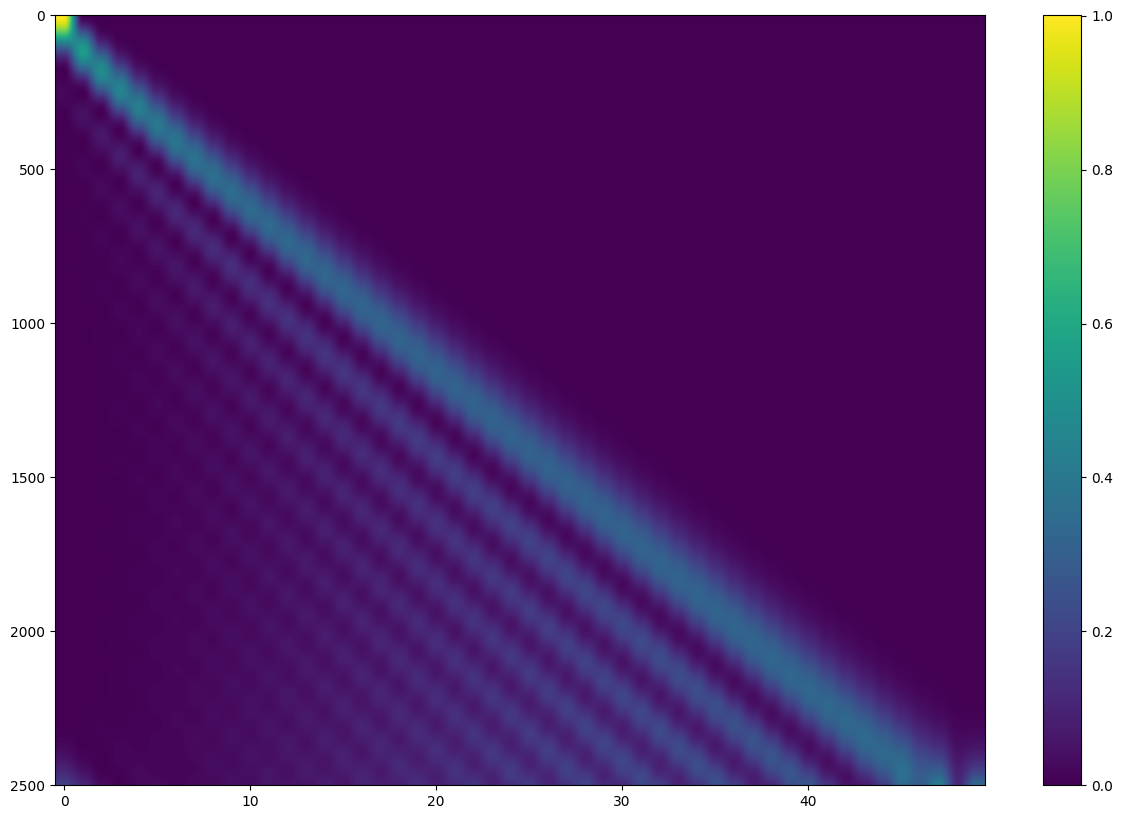

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

res = np.abs(res)**2
figD, axD = plt.subplots(figsize=(15,10))
im = axD.imshow(res,aspect='auto')
figD.colorbar(im)

## Defining a general simulator function

s is here defined as $s = \sigma^{-1} = \frac{2g^2}{\omega_R h}$ meaning that $s\propto g^2$.

In [16]:
def simulator(N,T,Ts,s,saveas=False,N0=0):
    init = np.zeros(N)
    init[N0]=1
    dt = T/Ts

    res = init
    res.reshape((N,1))

    old = init
    for i in range(Ts):
        new = np.zeros(N).astype(np.complex64)
        for n in range(N):
            if n == 0:
                dphiRe = (1j*s*abs(old[n])*old[n]+1j*(-2*old[n]+old[n+1]))*dt
            if n == N-1:
                dphiRe = (1j*s*abs(old[n])*old[n]+1j*(old[n-1]-2*old[n]))*dt
            else:
                dphiRe = (1j*s*abs(old[n])*old[n]+1j*(old[n-1]-2*old[n]+old[n+1]))*dt
            phin = old[n]+dphiRe
            new[n] = phin
        res = np.append(res,new)
        old = new

    res = res.reshape((Ts+1,N))

    res = np.abs(res)**2
    figD, axD = plt.subplots(figsize=(15,10))
    im = axD.imshow(res, aspect='auto', extent=([0,N,T,0]))
    axD.set_xlabel("n")
    axD.set_ylabel("T")
    axD.set_title(f"Simulation with s={s} and dt={round(dt,4)}")
    figD.colorbar(im)
    if saveas:
        try:
            figD.savefig(f"soliton/s={s}_dt={dt}.png")
        except Exception as e:
            print(e)

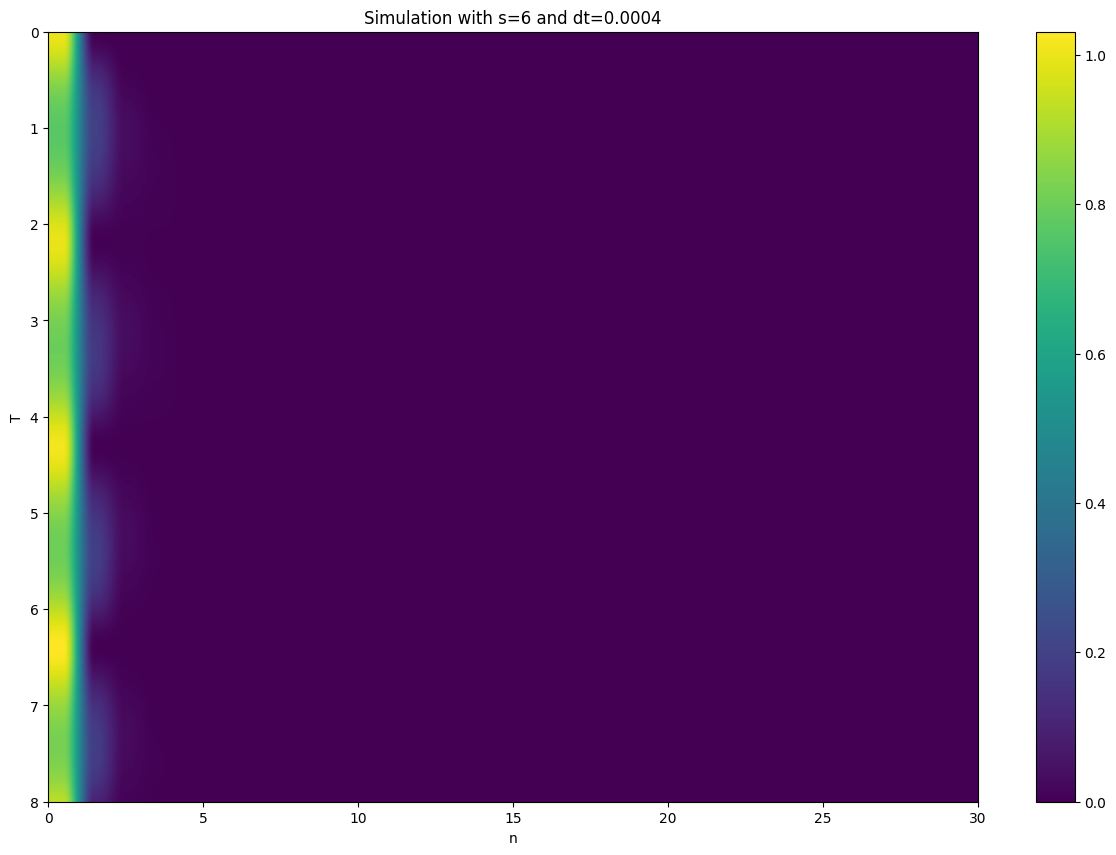

In [8]:
# T=15 and Ts=15000 takes around  24.4
# T=15 and Ts=20000 takes around  43.1
simulator(N=30,T=8,Ts=20000,s=6, saveas=False) # Strong coupling

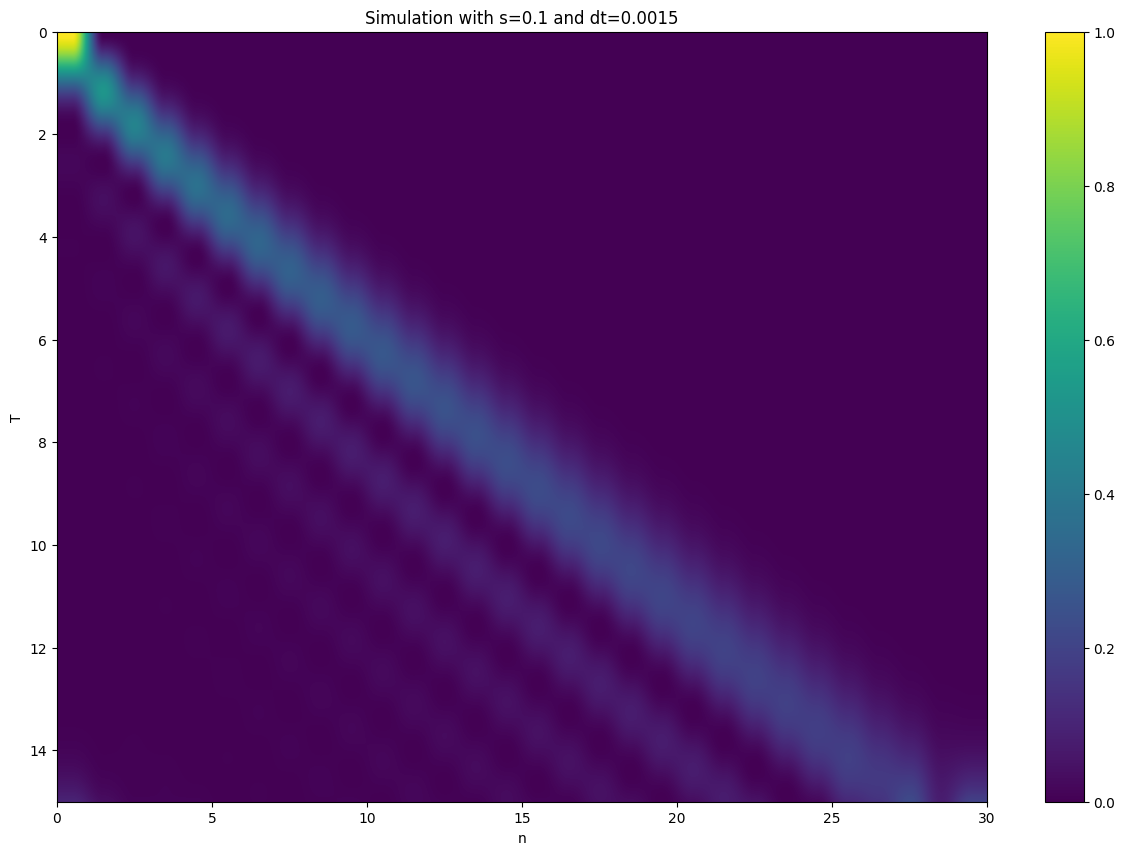

In [9]:
simulator(N=30,T=15,Ts=10000,s=0.1, saveas=False) # weak coupling

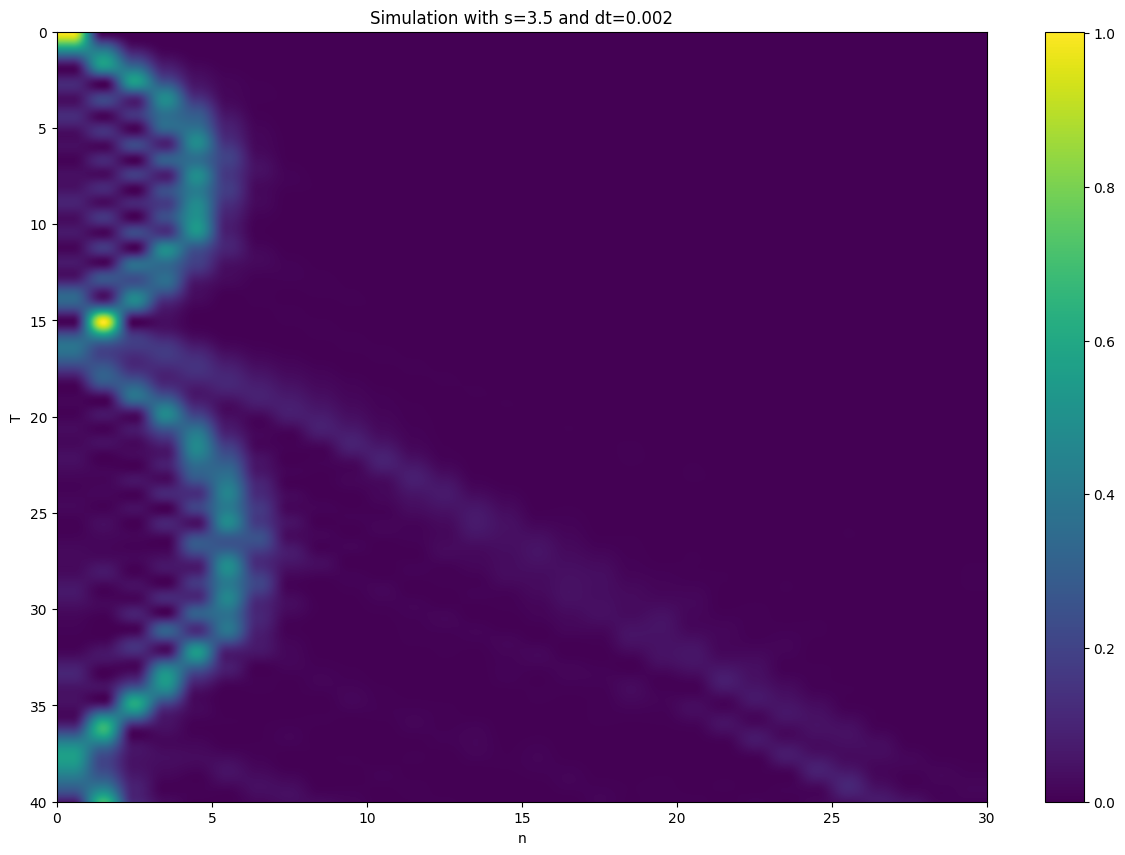

In [10]:
simulator(N=30,T=40,Ts=20000,s=3.5, saveas=True) # intermediate coupling

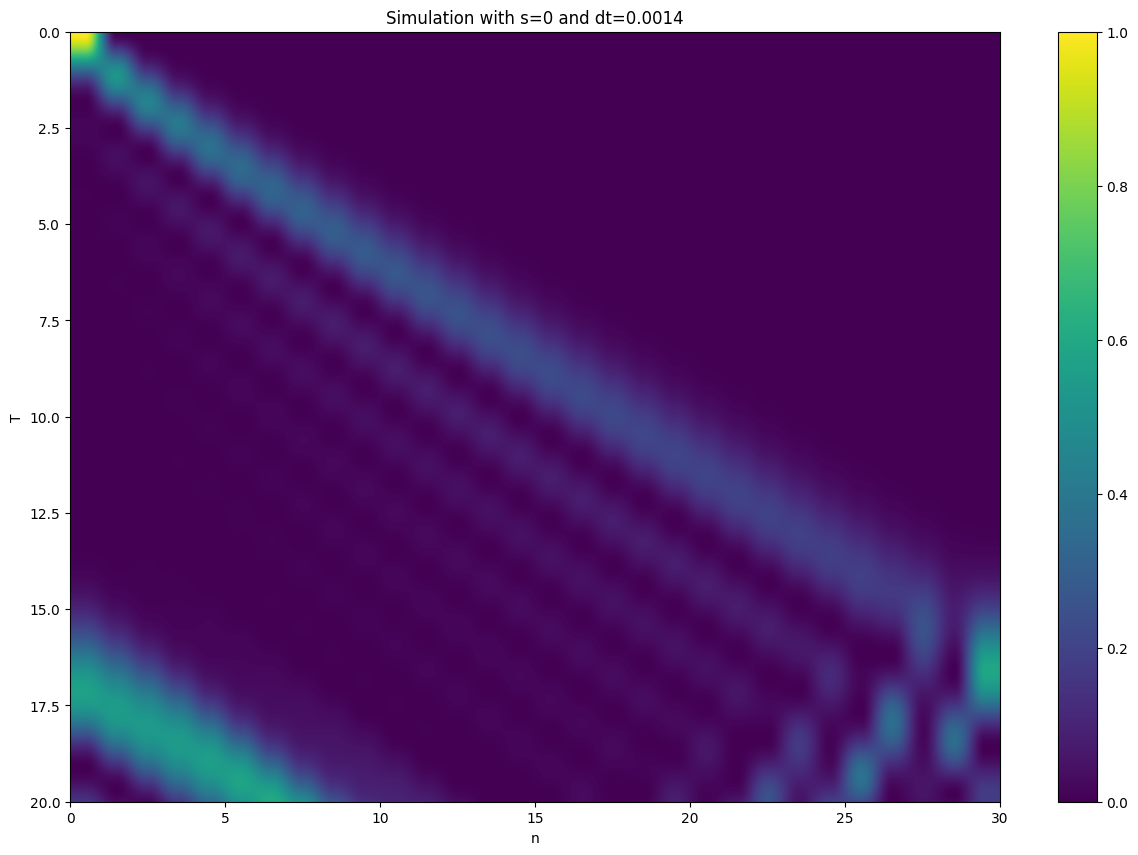

In [20]:
simulator(N=30,T=20,Ts=14000,s=0, saveas=False, N0=0) # weak coupling